In [19]:
import sys
sys.path.append('../source_code')
import data_utils as dl
import numpy as np
import ecg_utils as ecg
import matplotlib.pyplot as plt


## Loading in Apple Watch Data
The apple watch data is stored in a .csv file. The data is loaded into a pandas dataframe and the first 10 rows are removed, and the rest is the juicy signal to which we convert and export into a numpy array.

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.0005939006805419922 seconds
Execution time for threshold_calc: 4.696846008300781e-05 seconds
Execution time for peak: 8.797645568847656e-05 seconds
Execution time for r_wave_detector: 0.0007729530334472656 seconds
Execution time for threshold_calc: 3.0040740966796875e-05 seconds
Execution time for peak: 6.890296936035156e-05 seconds
Execution time for p_wave_detector: 0.00023508071899414062 seconds
Execution time for calculate_rr_int: 2.193450927734375e-05 seconds


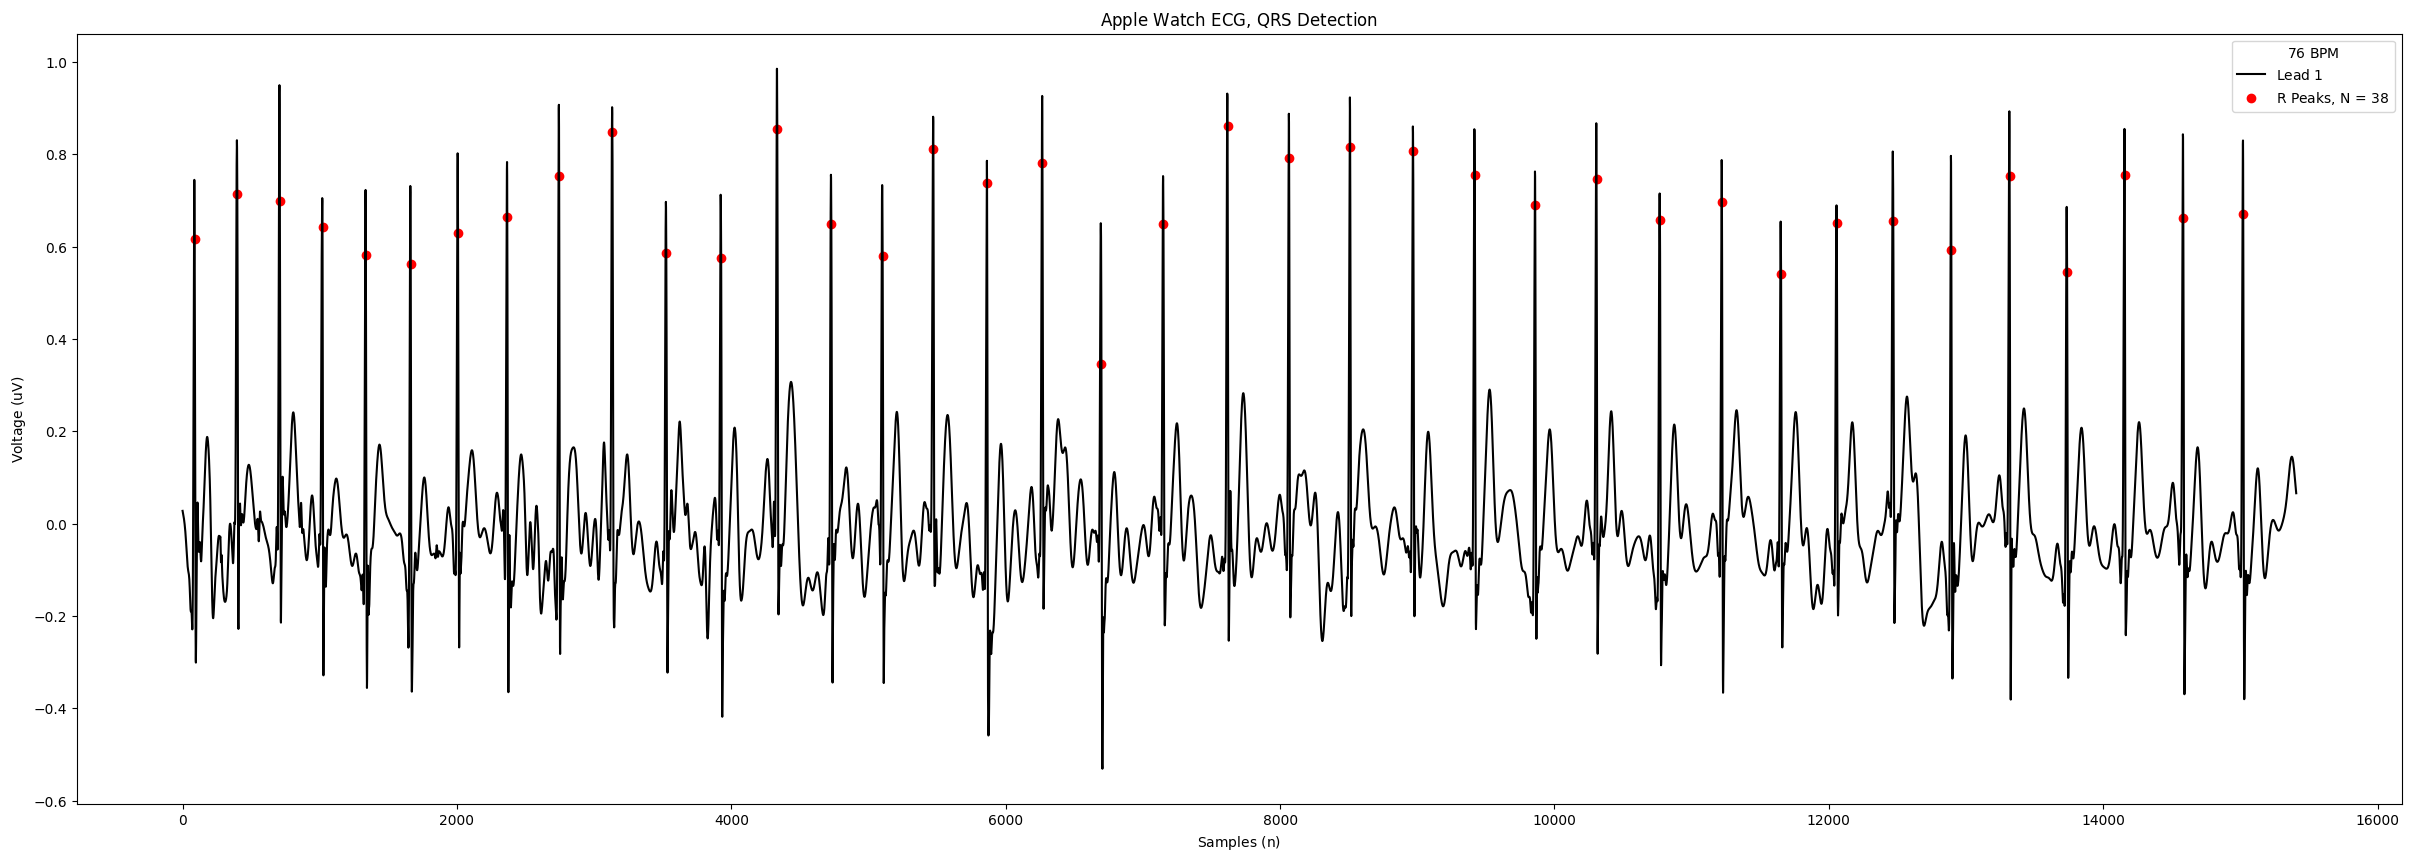

<Figure size 640x480 with 0 Axes>

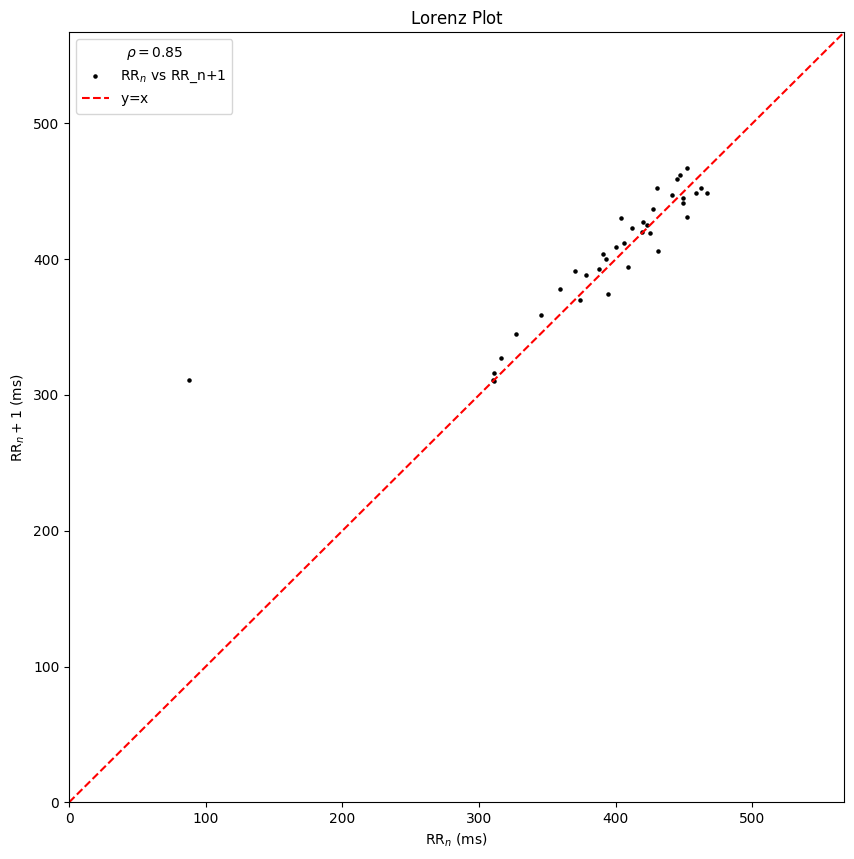

In [20]:
import data_utils as data
apple_watch_ecg = data.ecg_data(file_path='../data/ecg_2021-12-17.csv')
apple_watch_ecg.lead_1.r_plot()

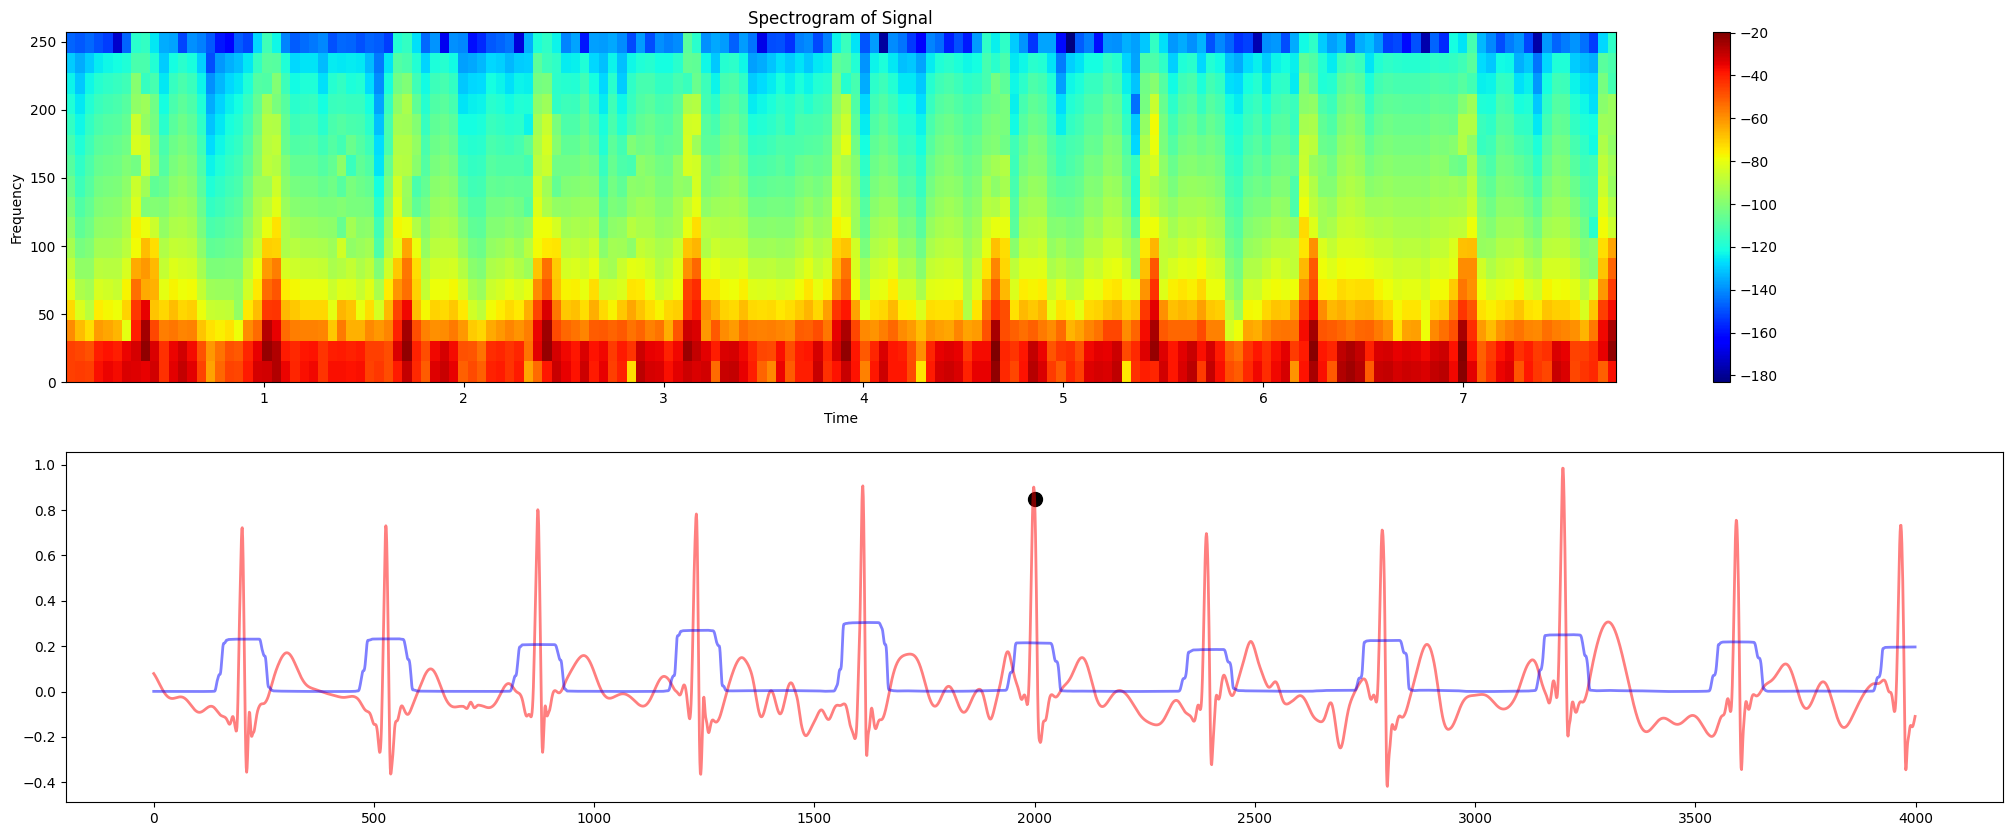

In [21]:
noise = apple_watch_ecg.lead_1.r_peaks[:,0][np.argmax(apple_watch_ecg.lead_1.r_peaks[:,1])]
t = noise
plt.figure(figsize=(25, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.specgram(apple_watch_ecg.lead_1.signal[t-2000:t+2000], Fs=apple_watch_ecg.fs, NFFT=32, noverlap=8, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram of Signal')

plt.subplot(2, 1, 2)
plt.plot(apple_watch_ecg.lead_1.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(apple_watch_ecg.lead_1.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, apple_watch_ecg.lead_1.signal[t], s=100, c='k', marker='o', label='R Peak')

plt.show()


In [22]:
## 3D Vectorcardiography

# Load the data
ecg_data = data.ecg_data(file_path='/Users/kevindejbod/dynamic_ecg/data/sample_ecg.npz')

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.009741783142089844 seconds
Execution time for threshold_calc: 0.00042176246643066406 seconds
Execution time for peak: 0.0011110305786132812 seconds
Execution time for r_wave_detector: 0.011301755905151367 seconds
Execution time for threshold_calc: 0.0003921985626220703 seconds
Execution time for peak: 0.0010390281677246094 seconds
Execution time for p_wave_detector: 0.0036318302154541016 seconds
Execution time for calculate_rr_int: 1.7881393432617188e-05 seconds
Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.009026050567626953 seconds
Execution time for threshold_calc: 0.0003409385681152344 seconds
Execution time for peak: 0.0008461475372314453 seconds
Execution time for r_wave_detector: 0.010226011276245117 seconds
Execution time for threshold_calc: 0.00022912025451660156 seconds
Execution time for peak: 0.0007970333099365234 seconds
Execution time for p_wave_detector: 0.003152847290039062

MovieWriter imagemagick unavailable; using Pillow instead.


Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.009806632995605469 seconds
Execution time for threshold_calc: 0.00041604042053222656 seconds
Execution time for peak: 0.0025110244750976562 seconds
Execution time for r_wave_detector: 0.01277017593383789 seconds
Execution time for threshold_calc: 0.0004010200500488281 seconds
Execution time for peak: 0.0034520626068115234 seconds
Execution time for p_wave_detector: 0.006155967712402344 seconds
Execution time for calculate_rr_int: 3.409385681152344e-05 seconds
Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.009277820587158203 seconds
Execution time for threshold_calc: 0.00032210350036621094 seconds
Execution time for peak: 0.001035928726196289 seconds
Execution time for r_wave_detector: 0.010661125183105469 seconds
Execution time for threshold_calc: 0.00023698806762695312 seconds
Execution time for peak: 0.0006601810455322266 seconds
Execution time for p_wave_detector: 0.003091096878051758 se

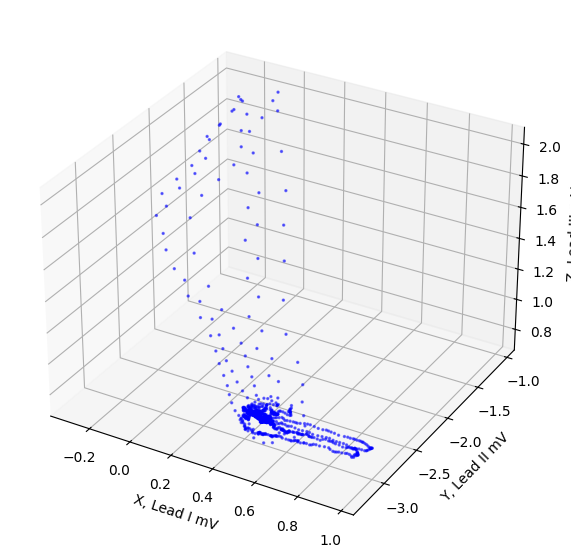

In [23]:
import html
from turtle import ht
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# Load the data

sig = dl.ecg_data(file_path='/Users/kevindejbod/dynamic_ecg/data/sample_ecg.npz')

import matplotlib.animation as animation

# Create a DataFrame
data = pd.DataFrame({
    'X': sig.lead_1.signal[1000:2000],
    'Y': sig.lead_2.signal[1000:2000],
    'Z': sig.lead_3.signal[1000:2000]
})

# Create a figure and axes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Initialize the plot
scatter = ax.scatter(data['X'], data['Y'], data['Z'], marker='o', color='b', s=2, alpha=0.5)

# Set labels
ax.set_xlabel('X, Lead I mV')
ax.set_ylabel('Y, Lead II mV')
ax.set_zlabel('Z, Lead III mV')

# Animation update function
def update(frame):
    scatter._offsets3d = (data['X'][:frame], data['Y'][:frame], data['Z'][:frame])
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(data), interval=10, blit=True)

# Show the animation in notebook
ani.save('3d_ecg.gif', writer='imagemagick', fps=60)